In [19]:
import pandas as pd

# Load dataset
df = pd.read_csv("datasets/UniversalBank.csv")

# Display first few rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Explanation of education:

"Advanced" → 0
"Graduate" → 1
"Undergrad" → 2

In [20]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
# Check for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [22]:
# Drop ID and ZIP Code
df.drop(columns=['ID', 'ZIP Code'], inplace=True)


🚨 Outliers detected in 'Income':
      Income
18       193
47       194
53       190
59       188
303      195
...      ...
4659     199
4670     194
4895     201
4981     195
4993     218

[96 rows x 1 columns]

🚨 Outliers detected in 'CCAvg':
      CCAvg
9      8.90
18     8.10
44     5.70
55     8.00
61     5.70
...     ...
4908   6.10
4911   7.50
4937   8.60
4980   5.30
4993   6.67

[324 rows x 1 columns]

🚨 Outliers detected in 'Mortgage':
      Mortgage
22         260
39         285
42         412
59         455
66         336
...        ...
4859       541
4865       342
4899       299
4942       308
4963       306

[291 rows x 1 columns]

Total unique outlier rows detected: 602


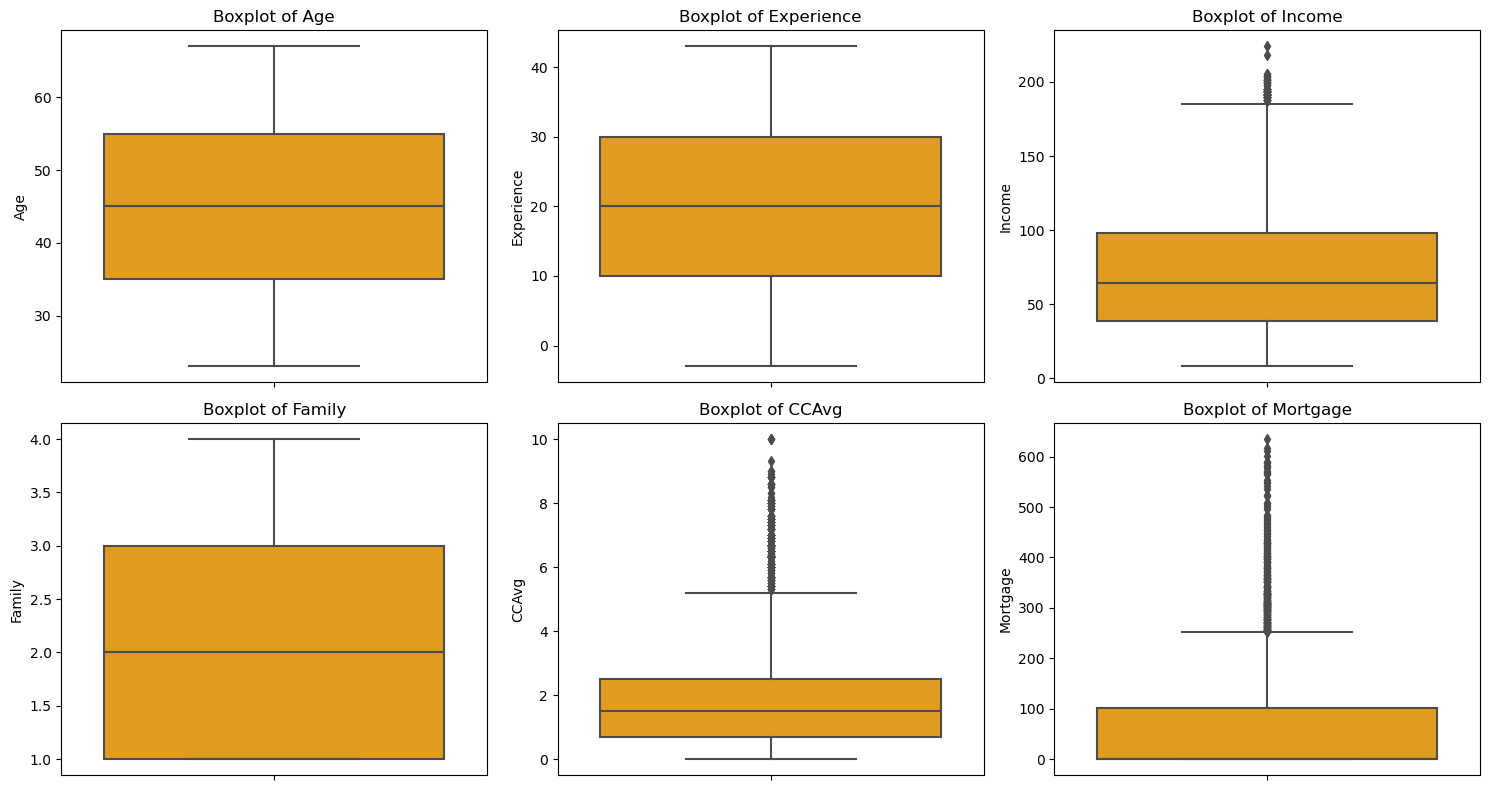

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect and print outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_rows = []
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            print(f"\n🚨 Outliers detected in '{col}':")
            print(outliers[[col]])

        # Store outlier row indices
        outlier_rows.extend(outliers.index.tolist())

    return list(set(outlier_rows))  # Return unique outlier row indices

# List of numerical columns to check for outliers
num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Detect and print outliers
outlier_indices = detect_outliers_iqr(df, num_cols)

print(f"\nTotal unique outlier rows detected: {len(outlier_indices)}")

# Function to visualize outliers using boxplots
def plot_outliers(df, columns):
    plt.figure(figsize=(15, 8))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)  # Adjust grid based on number of columns
        sns.boxplot(y=df[col], color="orange")
        plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# Show boxplots for numerical columns
plot_outliers(df, num_cols)

In [24]:
# Count total rows before removing outliers
before_count = df.shape[0]
print(f"🔹 Total Rows BEFORE Outlier Removal: {before_count}")

# Remove outliers
df_cleaned = df.drop(outlier_indices)

# Count total rows after removing outliers
after_count = df_cleaned.shape[0]
print(f"🔹 Total Rows AFTER Outlier Removal: {after_count}")

# Count of outliers removed
outliers_removed = before_count - after_count
print(f"🚨 Total Outliers Removed: {outliers_removed}")

🔹 Total Rows BEFORE Outlier Removal: 5000
🔹 Total Rows AFTER Outlier Removal: 4398
🚨 Total Outliers Removed: 602


In [25]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#🔹 Train SVM Models and Evaluate Performance

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score, classification_report

# Function to train & evaluate SVM with different kernels
def train_and_evaluate_svm(kernel_type):
    print(f"\n🔹 Training SVM with {kernel_type} kernel...")

    # Train the model
    model = SVC(kernel=kernel_type, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # R² Score
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Classification Report
    report = classification_report(y_test, y_test_pred)

    # Print results
    print(f"✅ Training Accuracy: {train_accuracy:.2f}")
    print(f"✅ Testing Accuracy: {test_accuracy:.2f}")
    print(f"📊 Training R² Score: {train_r2:.2f}")
    print(f"📊 Testing R² Score: {test_r2:.2f}")
    print(f"\n📜 Classification Report:\n{report}")

# Train & Evaluate with Different Kernels
train_and_evaluate_svm('linear')


🔹 Training SVM with linear kernel...
✅ Training Accuracy: 0.95
✅ Testing Accuracy: 0.95
📊 Training R² Score: 0.44
📊 Testing R² Score: 0.50

📜 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.91      0.61      0.73       105

    accuracy                           0.95      1000
   macro avg       0.94      0.80      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [34]:
train_and_evaluate_svm('rbf')


🔹 Training SVM with rbf kernel...
✅ Training Accuracy: 0.98
✅ Testing Accuracy: 0.98
📊 Training R² Score: 0.78
📊 Testing R² Score: 0.82

📜 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.99      0.85      0.91       105

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [35]:
train_and_evaluate_svm('poly')


🔹 Training SVM with poly kernel...
✅ Training Accuracy: 0.98
✅ Testing Accuracy: 0.98
📊 Training R² Score: 0.76
📊 Testing R² Score: 0.82

📜 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.99      0.85      0.91       105

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [37]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

def plot_decision_boundary(model, X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    model.fit(X_pca, y)
    
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, edgecolor='k')
    plt.title(title)
    plt.show()

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training Score')
    plt.plot(train_sizes, test_mean, label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.show()

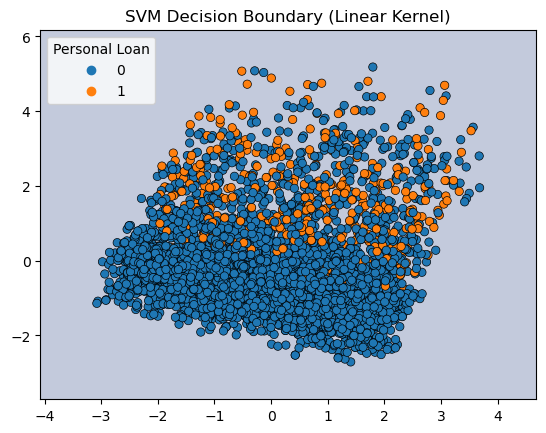

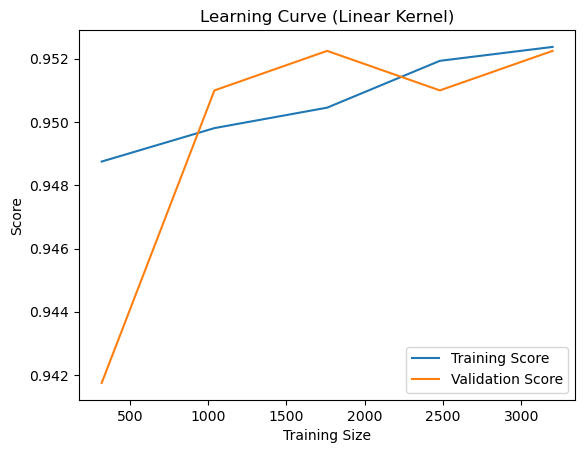

In [38]:
# Train and visualize decision boundary for linear kernel
linear_svm = SVC(kernel='linear')
plot_decision_boundary(linear_svm, X_train, y_train, 'SVM Decision Boundary (Linear Kernel)')
plot_learning_curve(linear_svm, X_train, y_train, 'Learning Curve (Linear Kernel)')

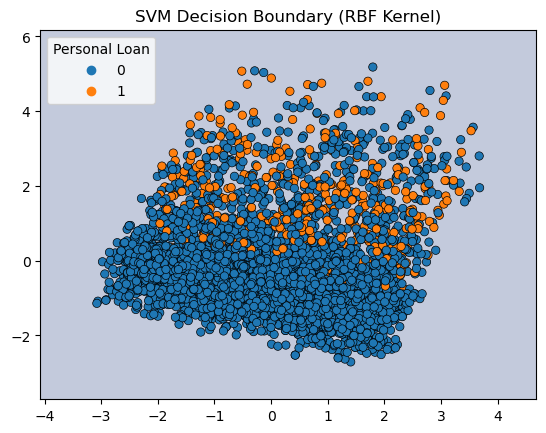

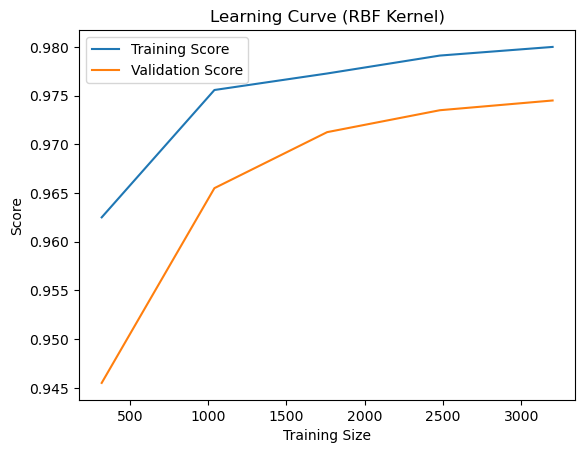

In [41]:
# Train and visualize decision boundary for RBF kernel
rbf_svm = SVC(kernel='rbf')
plot_decision_boundary(rbf_svm, X_train, y_train, 'SVM Decision Boundary (RBF Kernel)')
plot_learning_curve(rbf_svm, X_train, y_train, 'Learning Curve (RBF Kernel)')

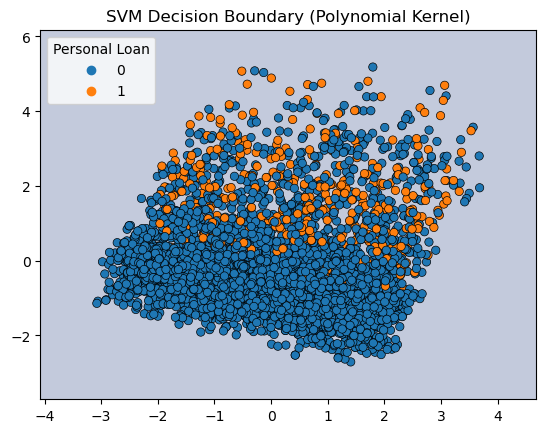

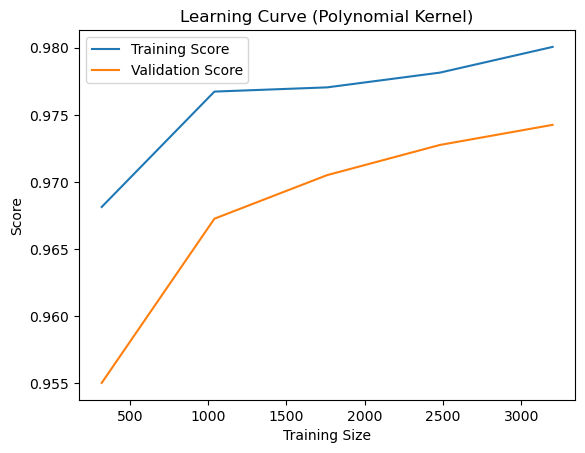

In [45]:
# Train and visualize decision boundary for Polynomial kernel
poly_svm = SVC(kernel='poly', degree=3)
plot_decision_boundary(poly_svm, X_train, y_train, 'SVM Decision Boundary (Polynomial Kernel)')
plot_learning_curve(poly_svm, X_train, y_train, 'Learning Curve (Polynomial Kernel)')

In [39]:
#✅ Step 7: Hyperparameter Tuning with Grid Search 🔍

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale'], 'kernel': ['linear', 'rbf', 'poly']}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [242]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define color map
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf, title="SVM Decision Boundary"):
    """
    Plots the decision boundary for a trained classifier using the first two features.

    Parameters:
    - X: Feature matrix (numpy array)
    - y: Target labels (numpy array)
    - clf: Trained classifier (SVM model)
    - title: Title of the plot (default: 'SVM Decision Boundary')
    """
    # Ensure X and y are NumPy arrays
    X = np.array(X)
    y = np.array(y)

    # Create meshgrid for plotting decision boundary
    X1, X2 = np.meshgrid(
        np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
        np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)
    )

    # Predict over the grid
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # Plot decision boundary
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Scatter plot for actual points
    for idx, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], 
                    color=zero_one_colourmap.colors[idx], label=class_label)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

In [46]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [54]:
from sklearn.svm import SVC

# Train SVM with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', degree=5, random_state=42)  # Default degree=3 for polynomial
svm_rbf = SVC(kernel='rbf', random_state=42)

# Fit models
svm_linear.fit(X_train_pca, y_train)
svm_poly.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)

SVC(random_state=42)

In [55]:
#Naya decision boundary function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define color map
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf, title="SVM Decision Boundary"):
    """
    Plots the decision boundary for a trained classifier using the first two features.

    Parameters:
    - X: Feature matrix (numpy array)
    - y: Target labels (numpy array)
    - clf: Trained classifier (SVM model)
    - title: Title of the plot (default: 'SVM Decision Boundary')
    """
    X = np.array(X)
    y = np.array(y)

    X1, X2 = np.meshgrid(
        np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
        np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)
    )

    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha=0.75, cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for idx, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], 
                    color=zero_one_colourmap.colors[idx], label=class_label)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

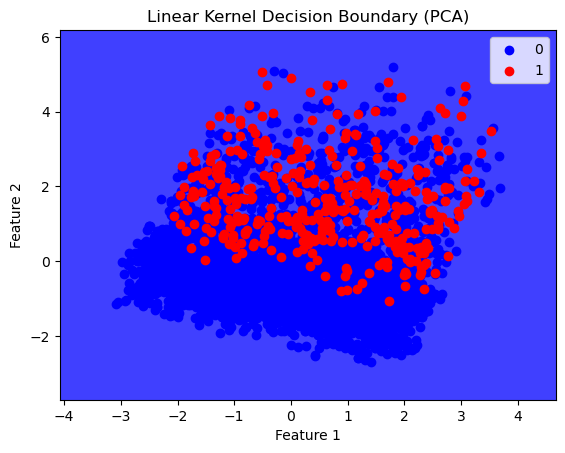

In [56]:
# Plot decision boundaries
plot_decision_boundary(X_train_pca, y_train, svm_linear, title="Linear Kernel Decision Boundary (PCA)")

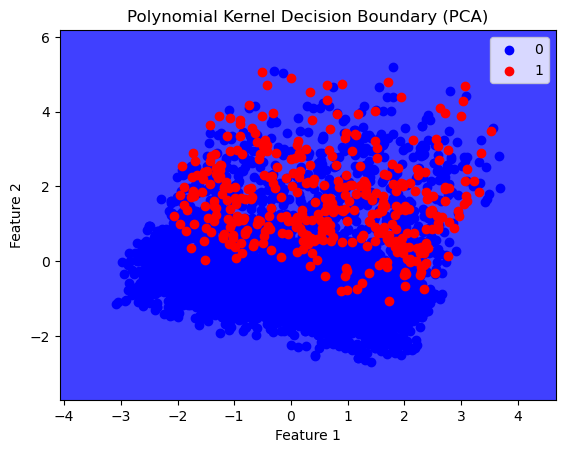

In [52]:
plot_decision_boundary(X_train_pca, y_train, svm_poly, title="Polynomial Kernel Decision Boundary (PCA)")

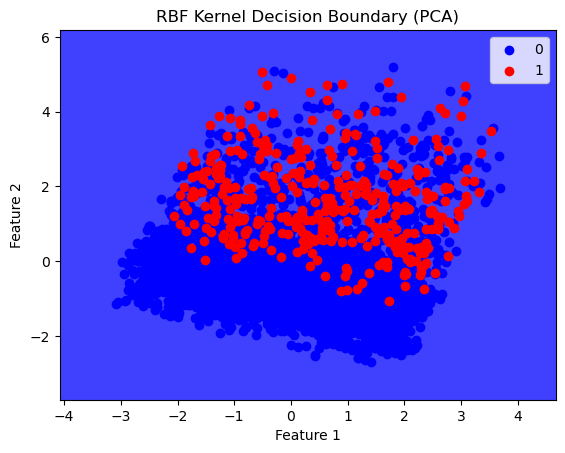

In [53]:
plot_decision_boundary(X_train_pca, y_train, svm_rbf, title="RBF Kernel Decision Boundary (PCA)")

In [58]:
print(pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

[0.27584344 0.24522494]
Total Variance Explained: 0.5210683845574117
